# Week 2 Solutions

# Part I

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x1,x2):
    return (x1-x2)**4+8*x1*x2-x1+x2+3

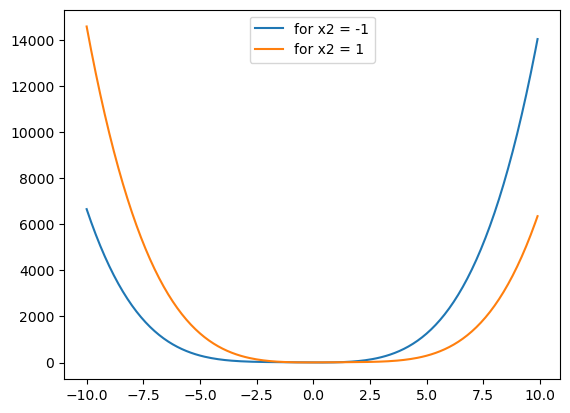

In [3]:
x = np.arange(-10,10,0.1)
y1 = f(x,-1)
y2 = f(x,1)

plt.plot(x,y1,label = "for x2 = -1")
plt.plot(x,y2,label = "for x2 = 1")
plt.legend()
plt.show()

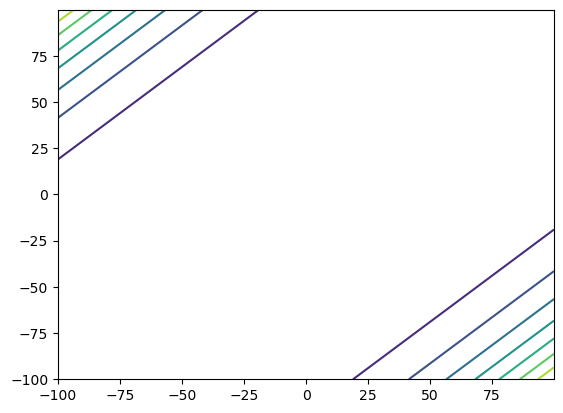

In [4]:
x1_contour = np.arange(-100,100,0.1)
x2_contour = np.arange(-100,100,0.1)
[x1,x2] = np.meshgrid(x1_contour,x2_contour)
fig,ax = plt.subplots(1,1)
Z = f(x1,x2)
ax.contour(x1,x2,Z)
plt.show()

#  Part II

## Question 1 Part A

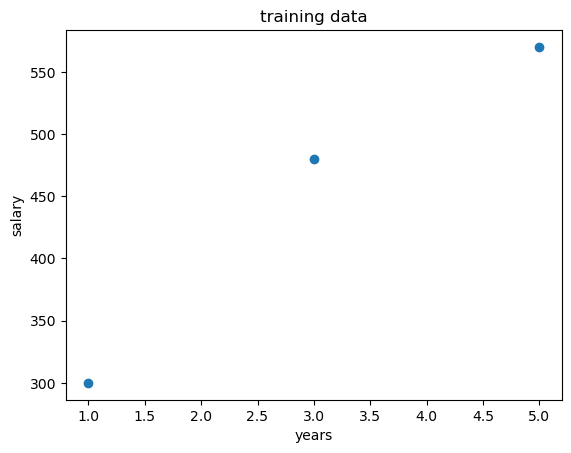

In [5]:
years = [1,3,5]
salary = [300,480,570]
plt.scatter(years,salary)
plt.xlabel("years")
plt.ylabel("salary")
plt.title("training data")
plt.show()

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame({'Years':years,'Salary': salary})
print (df)

   Years  Salary
0      1     300
1      3     480
2      5     570


## Question 1 Part B

In [8]:
# what needs to be done is to put in the values for years and get predicted salary.
# then find sum of square value of the differences between the predicted and actual values.
# return the square root of the sum obtained
def J(datfr,w = 200,b = 100):
    # w coefficients given to the input.
    # b represents the bias or intecept of the prediction function.
    temp = 0
    for index,row in datfr.iterrows():
        temp += (row[0]*w+b - row[1])**2
    return np.sqrt(temp)

In [9]:
J(df)

573.846669416143

## Question 1 Part C

In [10]:
def compute_gradient(datfr,w=200,b=100):
    temp1 = 0
    temp2 = 0
    for index,row in datfr.iterrows():
        temp1 += 2*(row[0]*w+b - row[1])*(row[0]) #dJ/dw
        temp2 += 2*(row[0]*w+b - row[1]) #dJ/db
    return(temp1,temp2)

## Question 2

In [11]:
def compute_gradient_descent(x_train,y_train,w_init=0,b_init=0,alpha=0.01,num_iters=10000):
    w = w_init
    b = b_init
    datfr = pd.DataFrame({'Years':x_train,'Salary': y_train})
    for i in np.arange(10000):
        temp = compute_gradient(datfr,w=w,b=b)
        w -= alpha*temp[0]
        b -= alpha*temp[1]
    print("w = {}".format(w))
    print("b = {}".format(b))
    print("Cost(J) = {}".format(J(datfr,w,b)))
    return (w,b)

In [12]:
compute_gradient_descent(years,salary)

w = 67.5000000000003
b = 247.4999999999989
Cost(J) = 36.742346141747674


(67.5000000000003, 247.4999999999989)

# Question 3

In [90]:
X_full = pd.read_csv('corrected_train_set.csv')
X_test_full = pd.read_csv('week_1_test.csv')

#print(X_full.head())
#X_full.shape

In [91]:
from sklearn.model_selection import train_test_split

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0,subset=['failure'],inplace=True)
y = X_full.failure
X_full.drop(['failure'],axis = 1,inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [93]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['id', 'loading',
                                                   'attribute_2', 'attribute_3',
                                                   'measurement_0',
                                                   'measurement_1',
                                                   'measurement_2',
                                                   'measurement_3',
                                                   'measurement_4',
                                                   'measurement_5',
                                                   'measurement_6',
                                                   'measurement_7',
                                                   'measurement_8',
                                                   'measurement_9',
                                                   'measurement_10',
                                                   'measurement_11',
                                                   'measurement_12',
                                                   'measurement_13',
                                                   'measurement_14',
                                                   'measurement_15',
                                                   'measurement_16',
                                                   'measurement_17']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['product_code',
                                                   'attribute_0',
                                                   'attribute_1'])])),
                ('model', RandomForestRegressor(random_state=0))])

In [94]:
preds = clf.predict(X_valid)

In [95]:
test_predictions = clf.predict(X_test_full)

In [96]:
result = pd.DataFrame(X_test_full.id)
result['failure'] = list(test_predictions)
print(result)

          id  failure
0      16108     0.30
1      16109     0.33
2      16110     0.33
3      16111     0.32
4      16112     0.31
...      ...      ...
10457  26565     0.47
10458  26566     0.30
10459  26567     0.37
10460  26568     0.44
10461  26569     0.30

[10462 rows x 2 columns]
